<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep1-2/EjercicioSep2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Importamos nuestro dataset desde Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#Leemos el dataset
houses = np.loadtxt("/content/drive/MyDrive/Data/houses.txt",delimiter=',').T
Xh = houses[0:4] #CAracteristicas de las casas
th = houses[-1] #Costo de la casa
labels = ["Tamaño","# de habitaciones","Pisos","Años"]

#Normalizamos de forma estandar
datax_mu = np.mean(Xh)
datax_sigma = np.std(Xh)
Xnorm = (Xh-datax_mu)/(datax_sigma)

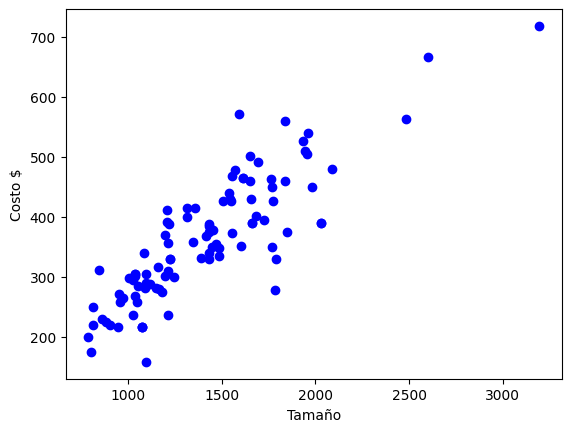

In [37]:
#Realizamos graficas del costo de las casas como funcion de cada caracteristica

plt.scatter(Xh[0],th,color='blue')
plt.xlabel('Tamaño')
plt.ylabel('Costo $')
plt.show()

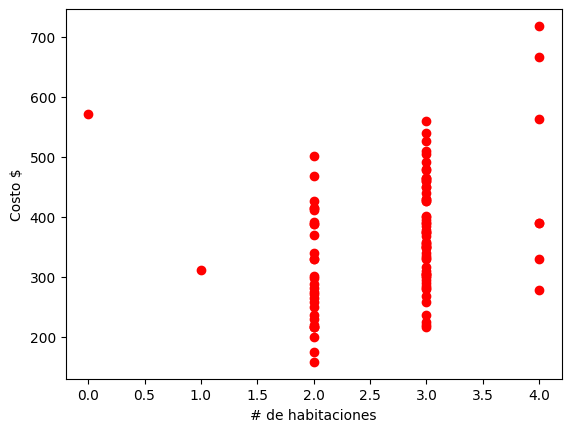

In [30]:
plt.scatter(Xh[1],th,color='red')
plt.xlabel('# de habitaciones')
plt.ylabel('Costo $')
plt.show()

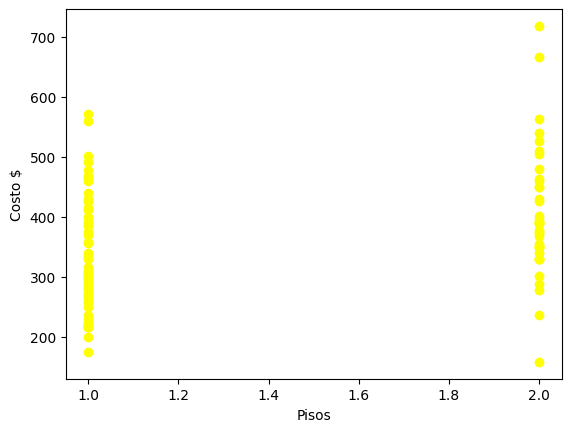

In [29]:
plt.scatter(Xh[2],th,color='yellow')
plt.xlabel('Pisos')
plt.ylabel('Costo $')
plt.show()

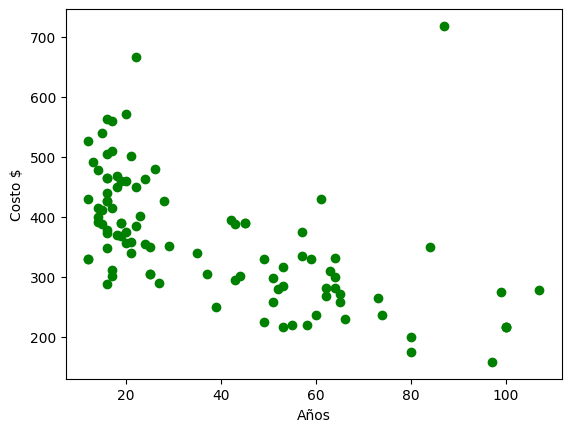

In [28]:
plt.scatter(Xh[3],th,color='green')
plt.xlabel('Años')
plt.ylabel('Costo $')
plt.show()

In [98]:
#Ahora necesitamos ajustar un modelo lineal usando todas las caracteristicas usando el metodo de gradiente descendiente, determinar el valor del parametro
#de aprendizaje que mejor funciona para este caso

#Se Define la función que calcula las derivas de L en base a los pesos
def DW(x,x1,x2,x3,y,W):
  N = 1/len(x)
  #Se construye la matriz
  X = np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa = np.vstack([x**i])
    Xb = np.vstack([x1**i])
    Xc = np.vstack([x2**i])
    Xd = np.vstack([x3**i])
    X = np.concatenate([X, Xa, Xb, Xc, Xd])
  #Se calculan las derivadas
  Dw0 = (N)*(np.sum((X.T @ W-y)))
  DW1 = (N)*(np.sum((X.T @ W-y) @ Xa))
  DW2 = (N)*(np.sum((X.T @ W-y) @ Xb))
  DW3 = (N)*(np.sum((X.T @ W-y) @ Xc))

  return Dw0,DW1,DW2,DW3

#Función que cualcula el costo en base a los pesos proprocionados
def cost(x,x1,x2,x3,y,W):
  N = 1/len(x)
  #Se construye la matriz
  X = np.vstack([np.ones_like(x)])
  for i in range(1,len(W)):
    Xa = np.vstack([x**i])
    Xb = np.vstack([x1**i])
    Xc = np.vstack([x2**i])
    Xd = np.vstack([x3**i])
    X = np.concatenate([X, Xa, Xb, Xc, Xd])
  #Se calcula el valor de la función costo
  cost = (N)*(np.sum((X.T @ W-y)**2))
  return cost

#Función para el gradiente
def Lgrad1 (x,t,W,a):
  C= cost(Xnorm[0],Xnorm[1],Xnorm[2],Xnorm[3],th,W)
  for i in range(100000):
    D=DW(x,t,W)
    #print(W)
    W[0]-=a*D[0]
    W[1]-=a*D[1]

W[0]=0
W[1]=0
alpha = 0.001

Yg=Lgrad1(Xnorm,th,W,alpha)

ValueError: ignored

In [80]:
Xh.T.shape


(100, 4)

In [88]:
th.shape

(100,)

In [104]:
w=np.zeros(100)
w.shape

(100,)